In [40]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

# Description of the dataset

**Source of dataset:** https://www.kaggle.com/datasets/zynicide/wine-reviews

**Number of observations**

**Number of variables per observation**



In [41]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df.sample(5)

Unnamed: 0    country  \
87975        87975     France   
21093        21093      Italy   
11059        11059      Spain   
117568      117568  Australia   
116569      116569   Portugal   

                                              description  \
87975   This attractive, herbal wine has intense fruit...   
21093   Black berry, plum, red currant and cedar aroma...   
11059   Earthy, lightly stalky aromas of leathery plum...   
117568  Daryl Groom has turned out a reasonably bold, ...   
116569  From one of the great names of Port, this LBV ...   

                 designation  points  price         province        region_1  \
87975                    NaN      85   25.0     Loire Valley        Sancerre   
21093             Tignanello      95  105.0          Tuscany         Toscana   
11059      Viña Real Crianza      89   18.0   Northern Spain           Rioja   
117568                   NaN      90   18.0  South Australia  Adelaide Hills   
116569  Late Bottled Vintage      88   20.0             Port             NaN   

       region_2        taster_name taster_twitter_handle  \
87975       NaN         Roger Voss            @vossroger   
21093       NaN      Kerin O’Keefe          @kerinokeefe   
11059       NaN  Michael Schachner           @wineschach   
117568      NaN     Joe Czerwinski                @JoeCz   
116569      NaN         Roger Voss            @vossroger   

                                                  title          variety  \
87975                       Rémy-Pannier 2015  Sancerre  Sauvignon Blanc   
21093   Marchesi Antinori 2010 Tignanello Red (Toscana)        Red Blend   
11059              CVNE 2011 Viña Real Crianza  (Rioja)      Tempranillo   
117568      Groom 2007 Sauvignon Blanc (Adelaide Hills)  Sauvignon Blanc   
116569      Delaforce 2009 Late Bottled Vintage  (Port)             Port   

                   winery  
87975        Rémy-Pannier  
21093   Marchesi Antinori  
11059                CVNE  
117568              Groom  
116569          Delaforce

**Meaning and type of the different variables**

In [42]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

# Data Cleaning

The column ‘Unnamed: 0’ is not needed as it is the line number and we already have that.

We find that the columns ‘taster_name’ and ‘taster_twitter_handle’ are also not useful for our project.

We proceed to delete these columns from the dataframe:

In [43]:
df.drop(columns=['Unnamed: 0', 'taster_name', 'taster_twitter_handle'], inplace=True)

### Drop duplicates

as first we check for duplicates and delete them

In [44]:
duplicated = df.duplicated().sum()
print(f"Total duplicate: {duplicated}")
df.drop_duplicates(inplace=True)
duplicated = df.duplicated().sum()
print(f"Total duplicate: {duplicated}")

Total duplicate: 9983
Total duplicate: 0


### Data Quality Assessment

Display of missing values, unique values and duplicates of each column

In [45]:
# Initialize a list to store the data
data_quality = []

# Calculate the metrics for each column and store them in the list
for column in df.columns:
    nan_count = df[column].isna().sum()
    unique_count = df[column].nunique()
    total_entries = df.shape[0]
    duplicates = total_entries - unique_count - nan_count
    
    data_quality.append({
        'Column': column,
        'Missing Values': nan_count,
        'Unique Values': unique_count,
        'Duplicates': duplicates
    })

# Create a DataFrame from the list
data_quality_df = pd.DataFrame(data_quality)

data_quality_df

Column  Missing Values  Unique Values  Duplicates
0       country              59             43      119886
1   description               0         119955          33
2   designation           34545          37979       47464
3        points               0             21      119967
4         price            8395            390      111203
5      province              59            425      119504
6      region_1           19560           1229       99199
7      region_2           73219             17       46752
8         title               0         118840        1148
9       variety               1            707      119280
10       winery               0          16757      103231

the columns that need to be arranged are ‘country’, ‘designation’, ‘price’, ‘province’, 'region_1', “region_2” and “variety”.

I also have to check ‘description’ as it should be unique for each wine

### Country column analysis

Filtering the DataFrame to show only rows where 'country' has NaN values

In [46]:
# Filter the DataFrame to show only rows where 'country' has NaN values
rows_with_nan = df[df['country'].isna()]
rows_with_nan.head(10)

country                                        description  \
913       NaN  Amber in color, this wine has aromas of peach ...   
3131      NaN  Soft, fruity and juicy, this is a pleasant, si...   
4243      NaN  Violet-red in color, this semisweet wine has a...   
9509      NaN  This mouthwatering blend starts with a nose of...   
9750      NaN  This orange-style wine has a cloudy yellow-gol...   
11150     NaN  A blend of 85% Melnik, 10% Grenache Noir and 5...   
11348     NaN  Light and fruity, this is a wine that has some...   
14030     NaN  This Furmint, grown in marl soils, has aromas ...   
16000     NaN  Jumpy, jammy aromas of foxy black fruits are s...   
16749     NaN  Winemaker: Bartho Eksteen. This wooded Sauvy s...   

                                   designation  points  price province  \
913                             Asureti Valley      87   30.0      NaN   
3131                                  Partager      83    NaN      NaN   
4243                  Red Naturally Semi-Sweet      88   18.0      NaN   
9509            Theopetra Malagouzia-Assyrtiko      92   28.0      NaN   
9750                 Orange Nikolaevo Vineyard      89   28.0      NaN   
11150                                      NaN      89   20.0      NaN   
11348                                 Partager      82    NaN      NaN   
14030                                    Márga      88   25.0      NaN   
16000        Valle de los Manantiales Vineyard      86   40.0      NaN   
16749  Cape Winemakers Guild Vloekskoot Wooded      91    NaN      NaN   

      region_1 region_2                                              title  \
913        NaN      NaN     Gotsa Family Wines 2014 Asureti Valley Chinuri   
3131       NaN      NaN                  Barton & Guestier NV Partager Red   
4243       NaN      NaN  Kakhetia Traditional Winemaking 2012 Red Natur...   
9509       NaN      NaN  Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...   
9750       NaN      NaN  Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...   
11150      NaN      NaN                                Orbelus 2013 Melnik   
11348      NaN      NaN                Barton & Guestier NV Partager White   
14030      NaN      NaN                         St. Donat 2013 Márga White   
16000      NaN      NaN  Familia Deicas 2015 Valle de los Manantiales V...   
16749      NaN      NaN  Bartho Eksteen 2016 Cape Winemakers Guild Vloe...   

               variety                           winery  
913            Chinuri               Gotsa Family Wines  
3131         Red Blend                Barton & Guestier  
4243          Ojaleshi  Kakhetia Traditional Winemaking  
9509       White Blend                         Tsililis  
9750        Chardonnay                         Ross-idi  
11150           Melnik                          Orbelus  
11348      White Blend                Barton & Guestier  
14030      White Blend                        St. Donat  
16000           Tannat                   Familia Deicas  
16749  Sauvignon Blanc                   Bartho Eksteen

59 lines are missing the country, province and region, so we have no idea where the wine comes from.

As these are 59 lines out of 111538, we decide to delete them.

In [47]:
df = df.dropna(subset=["country"])

### Description column analysis

Above we can see that the column "description" has 33 duplicate, a description is something unique, we must investigate

now i will display some duplicate wine to understand better

In [48]:
# Check for duplicates in the 'description' column
duplicate_descriptions = df[df.duplicated(subset='description', keep=False)]

# Display the duplicate 
#duplicate_descriptions_full = duplicate_descriptions
#duplicate_descriptions_full

duplicate_example = duplicate_descriptions[duplicate_descriptions['description'] == duplicate_descriptions.iloc[0]['description']]
duplicate_example_full = duplicate_example.head(5)

duplicate_example_full

country                                        description designation  \
2159    Italy  Easygoing and enjoyable, this has aromas of ma...         NaN   
22963   Italy  Easygoing and enjoyable, this has aromas of ma...         NaN   

       points  price       province                 region_1 region_2  \
2159       84   15.0  Central Italy  Montepulciano d'Abruzzo      NaN   
22963      86    NaN  Central Italy  Montepulciano d'Abruzzo      NaN   

                                            title        variety        winery  
2159         Valori 2014  Montepulciano d'Abruzzo  Montepulciano        Valori  
22963  Quattro Mani 2015  Montepulciano d'Abruzzo  Montepulciano  Quattro Mani

in this case we can see that all columns have the same values.

we show several rows to see if this is the case for all duplicates

In [49]:
sorted_duplicates = duplicate_descriptions.sort_values(by='description')
sorted_duplicates

country                                        description  \
71853   France  90–92. Barrel sample. This is a solid and dens...   
71851   France  90–92. Barrel sample. This is a solid and dens...   
105559  France  92–94. Barrel sample. With so much spicy fruit...   
105554  France  92–94. Barrel sample. With so much spicy fruit...   
73905    Italy  Almost too much of a good thing, Passo is a th...   
...        ...                                                ...   
19269    Italy  This zesty red has pretty aromas that suggest ...   
83693       US  Very ripe and forward in baked fruit or pie-fi...   
61484       US  Very ripe and forward in baked fruit or pie-fi...   
31584    Italy  Vibrant and spicy, this savory red delivers ar...   
21810    Italy  Vibrant and spicy, this savory red delivers ar...   

          designation  points  price           province              region_1  \
71853   Barrel Sample      91    NaN           Bordeaux       Moulis-en-Médoc   
71851   Barrel Sample      91    NaN           Bordeaux               Margaux   
105559  Barrel Sample      93    NaN           Bordeaux          Saint-Julien   
105554  Barrel Sample      93    NaN           Bordeaux              Pauillac   
73905           Passo      88   35.0             Veneto    Rosso del Veronese   
...               ...     ...    ...                ...                   ...   
19269             NaN      87   30.0            Tuscany   Rosso di Montalcino   
83693             NaN      84   45.0         California     Santa Ynez Valley   
61484         Reserve      85   48.0         California     Santa Ynez Valley   
31584         Costera      90   18.0  Sicily & Sardinia  Cannonau di Sardegna   
21810    Grotta Rossa      89   14.0  Sicily & Sardinia  Carignano del Sulcis   

             region_2                                              title  \
71853             NaN  Château Maucaillou 2012 Barrel Sample  (Moulis...   
71851             NaN  Château Pontac-Lynch 2012 Barrel Sample  (Marg...   
105559            NaN  Château Gruaud Larose 2012 Barrel Sample  (Sai...   
105554            NaN  Château Grand-Puy-Lacoste 2012 Barrel Sample  ...   
73905             NaN  Stefano Accordini 2007 Passo Red (Rosso del Ve...   
...               ...                                                ...   
19269             NaN                Carpineto 2014  Rosso di Montalcino   
83693   Central Coast            Sunstone 2006 Syrah (Santa Ynez Valley)   
61484   Central Coast    Sunstone 2006 Reserve Syrah (Santa Ynez Valley)   
31584             NaN      Argiolas 2013 Costera  (Cannonau di Sardegna)   
21810             NaN  Cantina Santadi 2012 Grotta Rossa  (Carignano ...   

                         variety                     winery  
71853   Bordeaux-style Red Blend         Château Maucaillou  
71851   Bordeaux-style Red Blend       Château Pontac-Lynch  
105559  Bordeaux-style Red Blend      Château Gruaud Larose  
105554  Bordeaux-style Red Blend  Château Grand-Puy-Lacoste  
73905                  Red Blend          Stefano Accordini  
...                          ...                        ...  
19269                 Sangiovese                  Carpineto  
83693                      Syrah                   Sunstone  
61484                      Syrah                   Sunstone  
31584                  Red Blend                   Argiolas  
21810                  Carignano            Cantina Santadi  

[66 rows x 11 columns]

You can see that in these wines, although the description is the same, there are columns with different values, so they are not duplicates

## Handle NaN

### Columns with string data type

We want to replace NaN value with 0 in the Price column

In [50]:
rows_with_nan = df[df['variety'].isna()]
rows_with_nan

country                                        description designation  \
86909   Chile  A chalky, dusty mouthfeel nicely balances this...         NaN   

       points  price      province region_1 region_2  \
86909      88   17.0  Maipo Valley      NaN      NaN   

                             title variety  winery  
86909  Carmen 1999  (Maipo Valley)     NaN  Carmen

In [51]:

df['variety'].fillna('Not-Available', inplace=True)

In [52]:
# Define the columns you want to check and replace NaN values
columns_to_check = ['designation', 'province', 'region_1', 'region_2', 'variety']

# Iterate over each column and replace NaN values with 'Not-available'
for column in columns_to_check:
    # Find the index of the row with NaN in the current column
    row_with_nan_index = df[df[column].isna()].index

    # Assign 'Not-available' to that row and column
    df.loc[row_with_nan_index, column] = 'Not-available'

### Price column


It makes no sense to replace NaN in the price with 0, because in most statistics we would discard these rows. So we decide to delete these 8391 rows

In [53]:
nan_count = df['price'].isna().sum()
print("Before:")
print(f"total NaN in price: {nan_count}")

#df['price'] = df['price'].fillna(0).astype('float64')
df = df.dropna(subset=['price'])

nan_count = df['price'].isna().sum()
print("After:")
print(f"total NaN in price: {nan_count}")

Before:
total NaN in price: 8391
After:
total NaN in price: 0


# Preprocessing

with this dataset is interesting create new columns, like price category and wine vintage

## Price Category column


at first we plot the histogram of the price to have a global idea

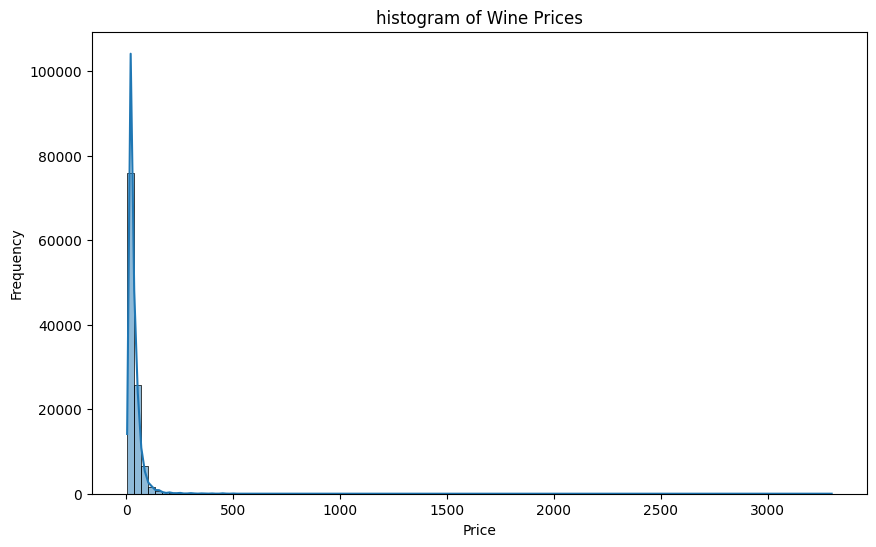

In [54]:
# Create a filtered DataFrame excluding rows where 'price' is 0 for the histogram
df_non_zero_price = df[df['price'] > 0]
df = df_non_zero_price

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('histogram of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



As we can see, the plot of the price is left-skewed, and we could also observe it by catecorize the wines in a price category

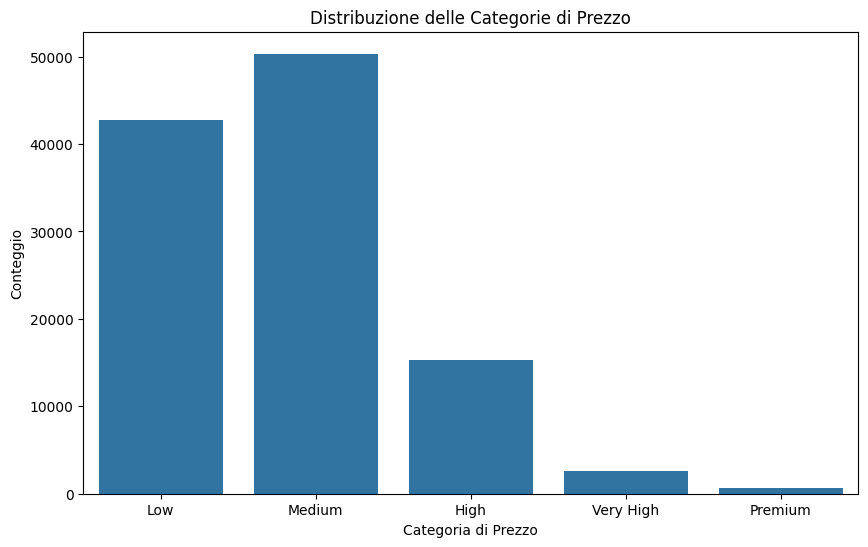

In [55]:
bins = [0, 20, 50, 100, 200, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High', 'Premium']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

# Creazione della colonna "annata del vino"
df['vintage'] = df['title'].str.extract(r'(\d{4})', expand=False)
df['vintage'] = pd.to_numeric(df['vintage'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_category')
plt.title('Distribuzione delle Categorie di Prezzo')
plt.xlabel('Categoria di Prezzo')
plt.ylabel('Conteggio')
plt.show()


## Wine Vintage column

In [56]:
import re
# Function to extract the vintage year from the title or description
def extract_vintage(row):
    # Try to find the year in the title first
    title_match = re.search(r'\b(19|20)\d{2}\b', row['title'])
    if title_match:
        return int(title_match.group(0))
    # If not found in title, try to find the year in the description
    description_match = re.search(r'\b(19|20)\d{2}\b', row['description'])
    if description_match:
        return int(description_match.group(0))
    # If not found in either, return None
    return None

# Apply the function to the dataframe to create the vintage column
df['vintage'] = df.apply(extract_vintage, axis=1)

nan_counts = df.isna().sum()
nan_counts
print("Number of NaN: ", nan_count)

# Converting the vintage column to integer type to remove the .0
df['vintage'] = df['vintage'].astype('Int64')

#new column check
df[['title', 'description', 'vintage']].head()


Number of NaN:  0


title  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3  St. Julian 2013 Reserve Late Harvest Riesling ...   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...   

                                         description  vintage  
1  This is ripe and fruity, a wine that is smooth...     2011  
2  Tart and snappy, the flavors of lime flesh and...     2013  
3  Pineapple rind, lemon pith and orange blossom ...     2013  
4  Much like the regular bottling from 2012, this...     2012  
5  Blackberry and raspberry aromas show a typical...     2011

In [57]:
df

country                                        description  \
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
5          Spain  Blackberry and raspberry aromas show a typical...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price        province  \
1                                     Avidagos      87   15.0           Douro   
2                                Not-available      87   14.0          Oregon   
3                         Reserve Late Harvest      87   13.0        Michigan   
4           Vintner's Reserve Wild Child Block      87   65.0          Oregon   
5                                 Ars In Vitro      87   15.0  Northern Spain   
...                                        ...     ...    ...             ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0           Mosel   
129967                           Not-available      90   75.0          Oregon   
129968                                   Kritt      90   30.0          Alsace   
129969                           Not-available      90   32.0          Alsace   
129970           Lieu-dit Harth Cuvée Caroline      90   21.0          Alsace   

                   region_1           region_2  \
1             Not-available      Not-available   
2         Willamette Valley  Willamette Valley   
3       Lake Michigan Shore      Not-available   
4         Willamette Valley  Willamette Valley   
5                   Navarra      Not-available   
...                     ...                ...   
129966        Not-available      Not-available   
129967               Oregon       Oregon Other   
129968               Alsace      Not-available   
129969               Alsace      Not-available   
129970               Alsace      Not-available   

                                                    title             variety  \
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5       Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
...                                                   ...                 ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...            Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)          Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...      Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)          Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...      Gewürztraminer   

                                          winery price_category  vintage  
1                            Quinta dos Avidagos            Low     2011  
2                                      Rainstorm            Low     2013  
3                                     St. Julian            Low     2013  
4                                   Sweet Cheeks           High     2012  
5                                         Tandem            Low     2011  
...                                          ...            ...      ...  
129966  Dr. H. Thanisch (Erben Müller-Burggraef)         Medium     2013  
129967   

# Data Exploration

 Analysis and visualisation of our data 

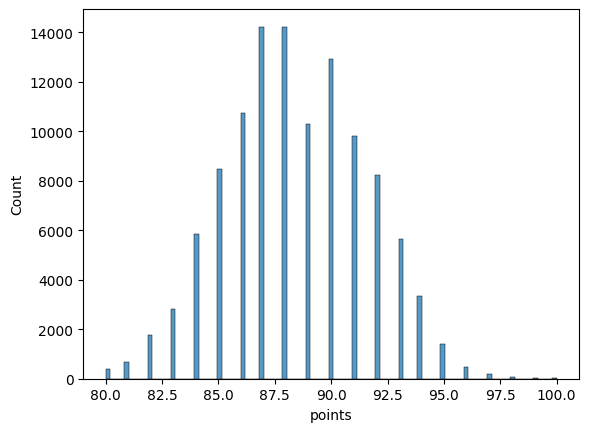

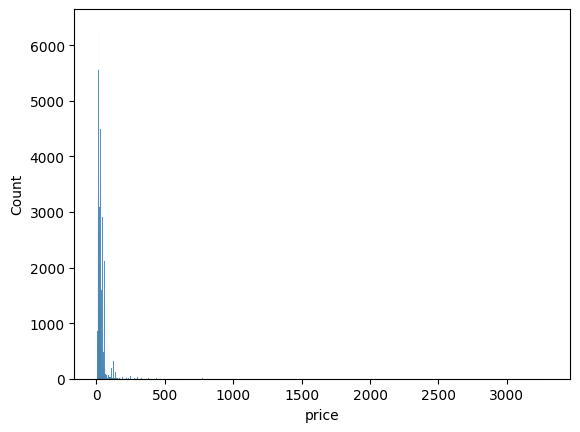

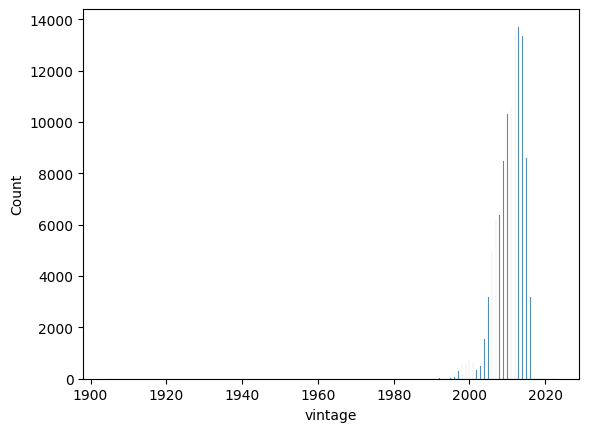

In [58]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

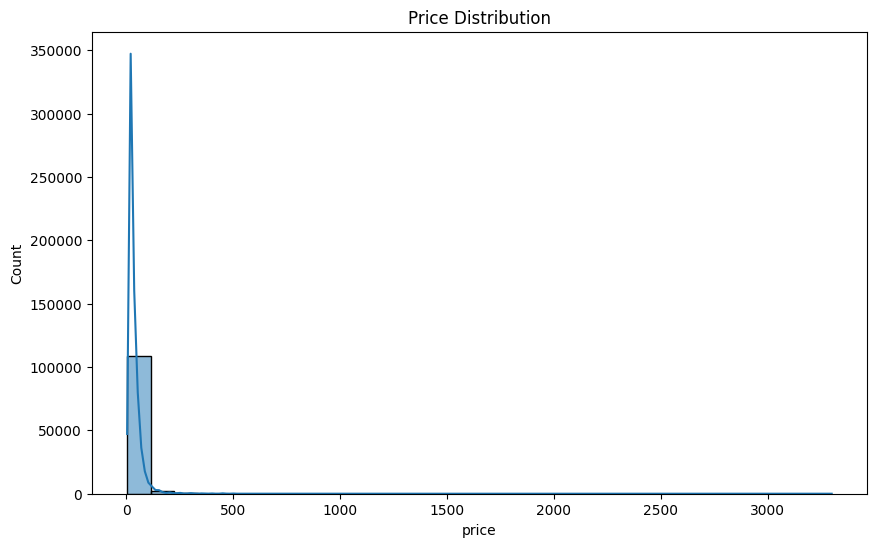

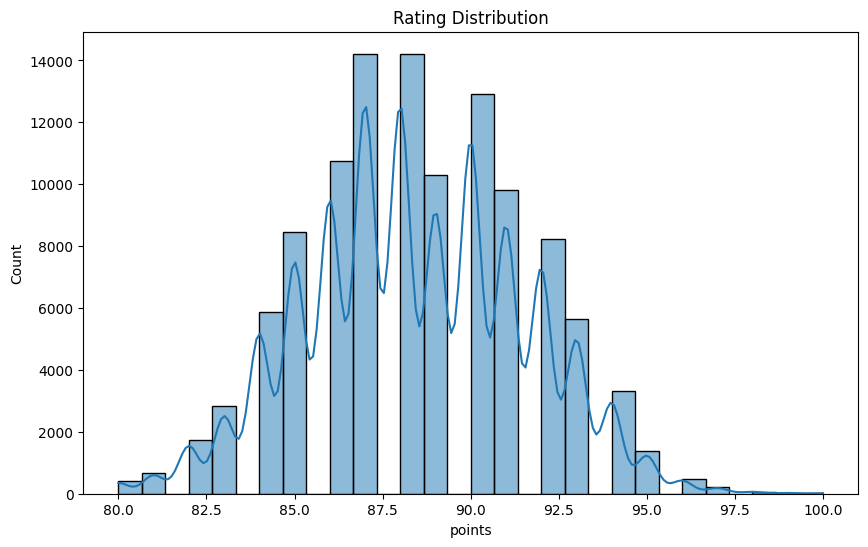

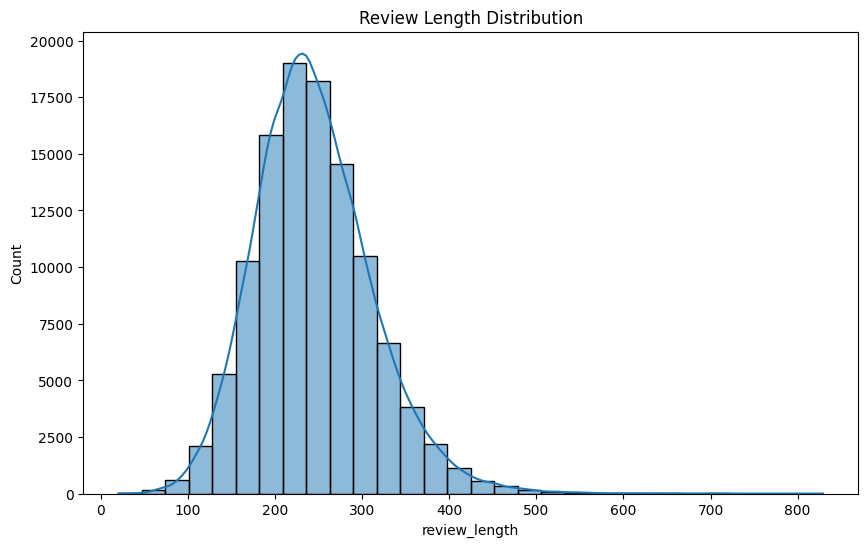

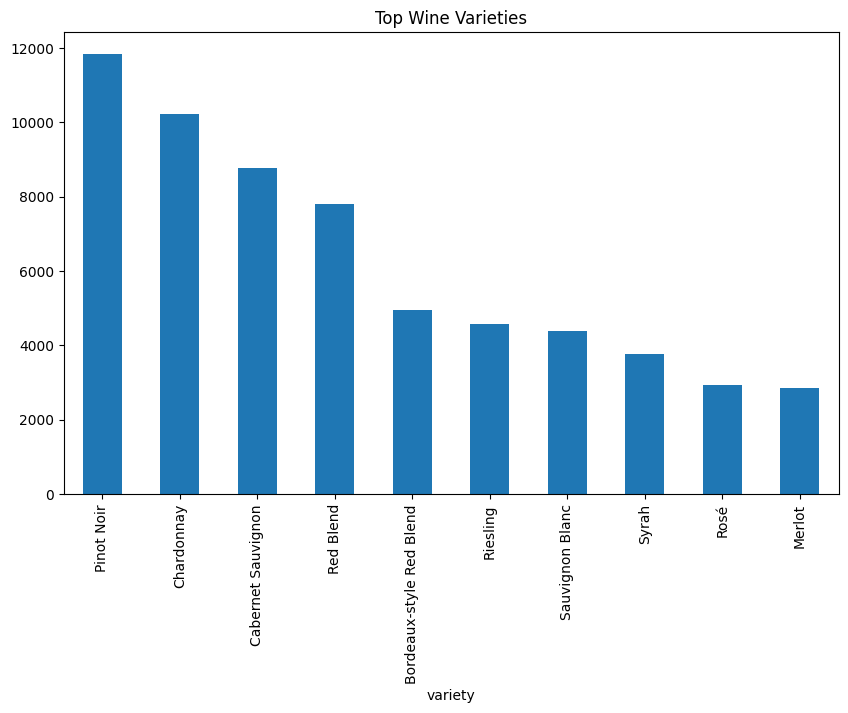

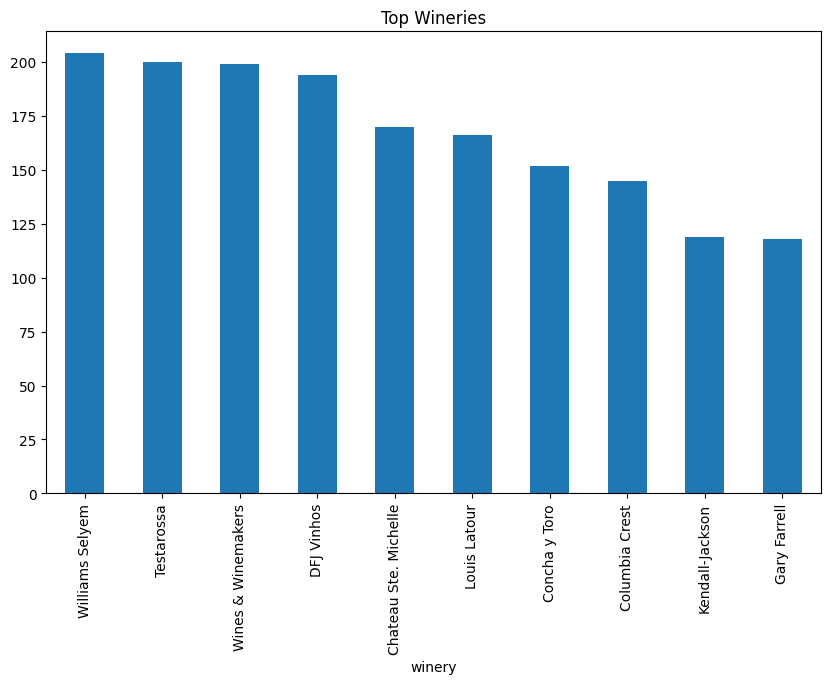

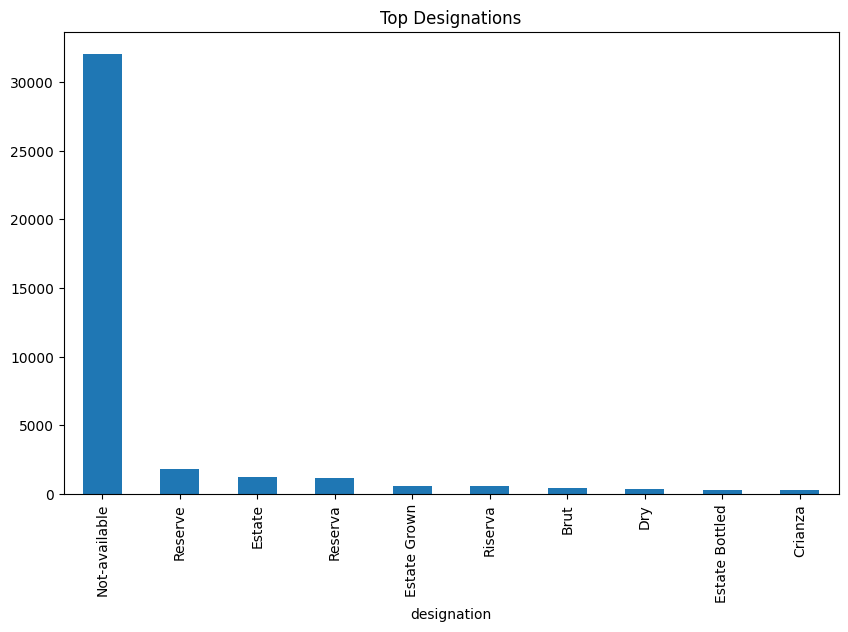

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['points'], bins=30, kde=True)
plt.title('Rating Distribution')
plt.show()

df['review_length'] = df['description'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Review Length Distribution')
plt.show()

# Bar Charts and Pie Charts
plt.figure(figsize=(10, 6))
df['variety'].value_counts().head(10).plot(kind='bar')
plt.title('Top Wine Varieties')
plt.show()

plt.figure(figsize=(10, 6))
df['winery'].value_counts().head(10).plot(kind='bar')
plt.title('Top Wineries')
plt.show()

plt.figure(figsize=(10, 6))
df['designation'].value_counts().head(10).plot(kind='bar')
plt.title('Top Designations')
plt.show()


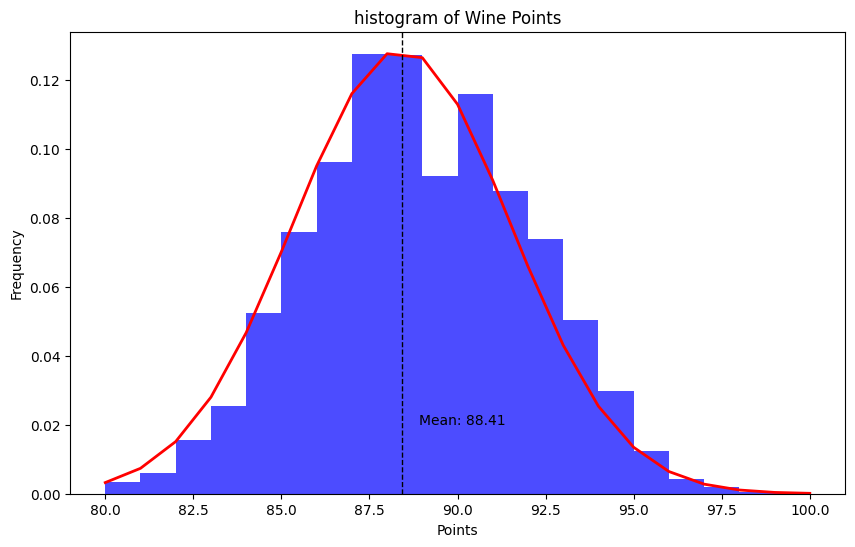

In [60]:
# Histogram of Wine Points
# Assuming 'points' is your column of interest
mean_points = df['points'].mean()
std_points = df['points'].std()

# Generate values for the normal distribution curve
normal_dist = stats.norm.pdf(sorted(df['points']), mean_points, std_points)

plt.figure(figsize=(10, 6))
plt.hist(df['points'], bins=20, density=True, color='blue', alpha=0.7)
plt.plot(sorted(df['points']), normal_dist, color='red', linewidth=2)
plt.title('histogram of Wine Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.axvline(mean_points, color='k', linestyle='dashed', linewidth=1)
plt.text(mean_points + 0.5, 0.02, f'Mean: {mean_points:.2f}', rotation=0)
plt.show()



In [61]:
import plotly.express as px
# Ensure the country data is clean
df['country'] = df['country'].fillna('Unknown')

# Count the number of wines per country
country_wine_counts = df['country'].value_counts().reset_index()
country_wine_counts.columns = ['country', 'count']

# Generate the world map
fig = px.choropleth(country_wine_counts,
                    locations="country",
                    locationmode='country names',
                    color="count",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="World Wine Distribution")
fig.update_layout(width=1200, height=600)
fig.show()

In [62]:
country_rating_avg = df.groupby('country')['points'].mean().reset_index()
country_rating_avg.columns = ['country', 'average_rating']

# Genera la mappa del mondo per la media dei punteggi
fig = px.choropleth(country_rating_avg,
                    locations="country",
                    locationmode='country names',
                    color="average_rating",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Average Wine Rating by Country")
fig.update_layout(width=1200, height=600)
fig.show()

In [63]:
country_price_avg = df.groupby('country')['price'].mean().reset_index()
country_price_avg.columns = ['country', 'average_price']

# Genera la mappa del mondo per la media dei prezzi
fig = px.choropleth(country_price_avg,
                    locations="country",
                    locationmode='country names',
                    color="average_price",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Average Wine Price by Country")
fig.update_layout(width=1200, height=600)
fig.show()

# Hypotesis testing

## state of three hypotesis testing:
1 - Null Hypothesis (H0): There is no difference in the average price of red wines and white wines.
    Alternative Hypothesis (H1): There is a significant difference in the average price of red wines compared to white wines.

2 - Null Hypothesis (H0): The mean rating of wines from 2000 onwards is equal to or less than the mean rating of wines produced before 2000.
    Alternative Hypothesis (H1): The mean rating of wines from 2000 onwards is higher than the mean rating of wines produced before 2000.

3 - Null hypothesis (H0): There is no difference in average points between wines from Italy and France.
    Alternative hypothesis (H1): There is a difference in average points between wines from Italy and France. 

In [64]:
# 3
italy_points = df[df['country'] == 'Italy']['points']
france_points = df[df['country'] == 'France']['points']

# Perform t-test
t_stat, p_value = ttest_ind(italy_points.dropna(), france_points.dropna())
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -3.536693724806343, P-value: 0.0004057458126417761


# Confidence Intervals

 Wine Ratings Confidence Intervals By Country

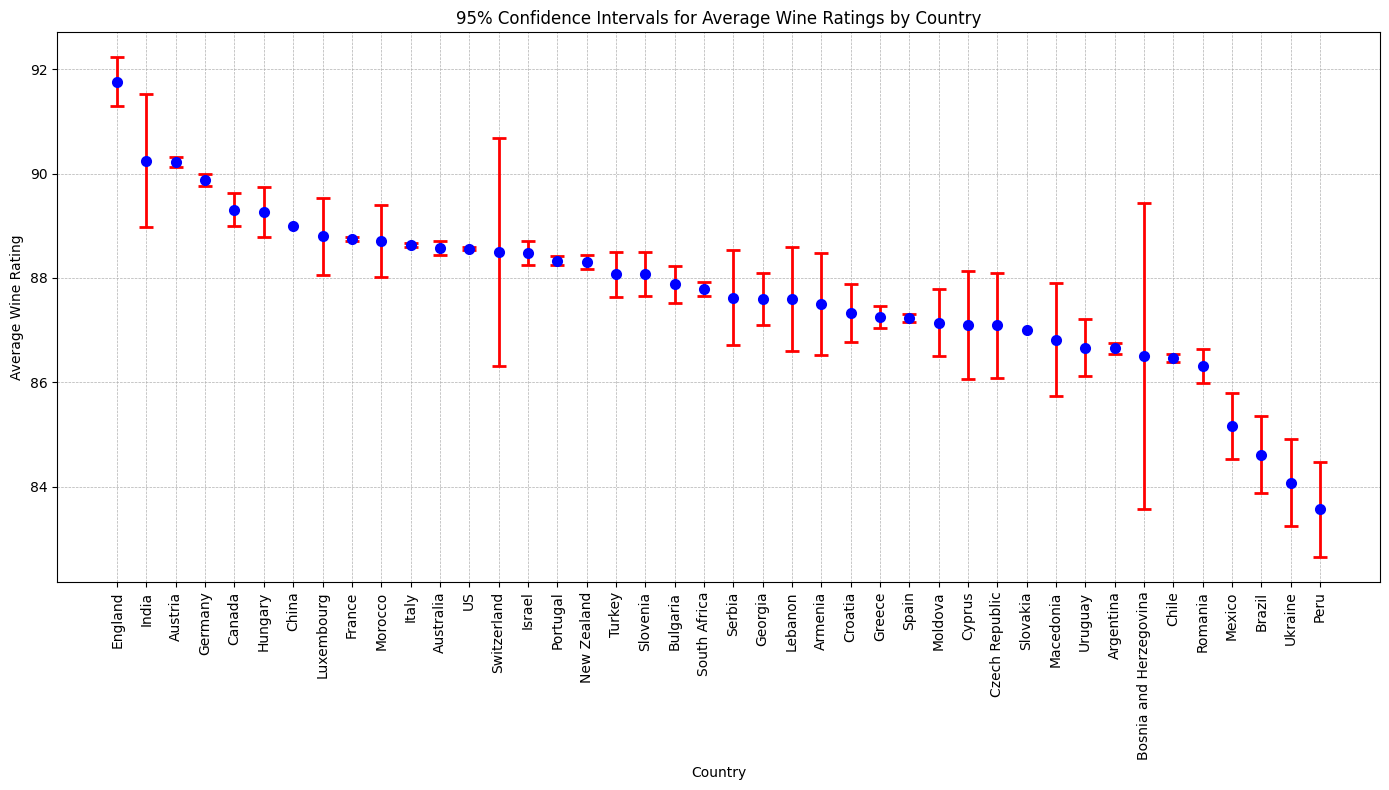

In [65]:
wine_data_filtered = df[['country', 'points']].dropna()

# Calculate mean and confidence interval for each country
countries = wine_data_filtered['country'].unique()
confidence_intervals = []

for country in countries:
    country_data = wine_data_filtered[wine_data_filtered['country'] == country]['points']
    mean = np.mean(country_data)
    confidence = stats.norm.interval(0.95, loc=mean, scale=stats.sem(country_data))
    confidence_intervals.append((country, mean, confidence[0], confidence[1]))

# Create a DataFrame for better visualization
confidence_df = pd.DataFrame(confidence_intervals, columns=['Country', 'Mean', 'Lower CI', 'Upper CI'])
confidence_df = confidence_df.sort_values(by='Mean', ascending=False)

# Plotting the confidence intervals
plt.figure(figsize=(14, 8))
plt.errorbar(confidence_df['Country'], confidence_df['Mean'], 
             yerr=[confidence_df['Mean'] - confidence_df['Lower CI'], confidence_df['Upper CI'] - confidence_df['Mean']], 
             fmt='o', ecolor='r', capsize=5, elinewidth=2, markeredgewidth=2, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Wine Rating')
plt.title('95% Confidence Intervals for Average Wine Ratings by Country')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

Wine Price Confidence Intervals By Country

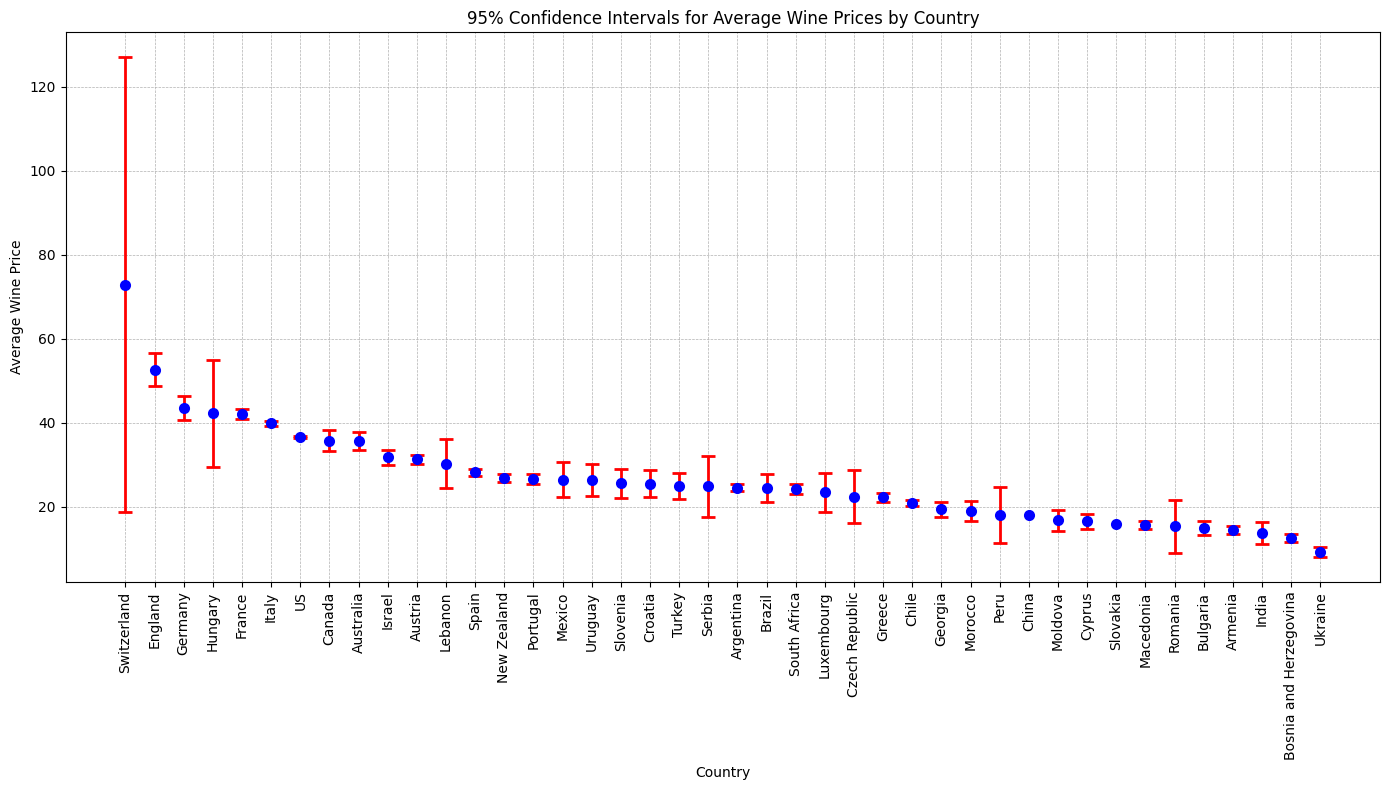

In [66]:
wine_data_filtered_price = df[['country', 'price']].dropna()

# Calculate mean and confidence interval for each country for price
confidence_intervals_price = []

for country in countries:
    country_data = wine_data_filtered_price[wine_data_filtered_price['country'] == country]['price']
    if len(country_data) > 1:  # To ensure we have enough data points to calculate the interval
        mean = np.mean(country_data)
        confidence = stats.norm.interval(0.95, loc=mean, scale=stats.sem(country_data))
        confidence_intervals_price.append((country, mean, confidence[0], confidence[1]))
    else:
        confidence_intervals_price.append((country, np.mean(country_data), np.nan, np.nan))

# Create a DataFrame for better visualization
confidence_df_price = pd.DataFrame(confidence_intervals_price, columns=['Country', 'Mean', 'Lower CI', 'Upper CI'])
confidence_df_price = confidence_df_price.sort_values(by='Mean', ascending=False)

# Plotting the confidence intervals for price
plt.figure(figsize=(14, 8))
plt.errorbar(confidence_df_price['Country'], confidence_df_price['Mean'], 
             yerr=[confidence_df_price['Mean'] - confidence_df_price['Lower CI'], confidence_df_price['Upper CI'] - confidence_df_price['Mean']], 
             fmt='o', ecolor='r', capsize=5, elinewidth=2, markeredgewidth=2, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Wine Price')
plt.title('95% Confidence Intervals for Average Wine Prices by Country')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

Comparison

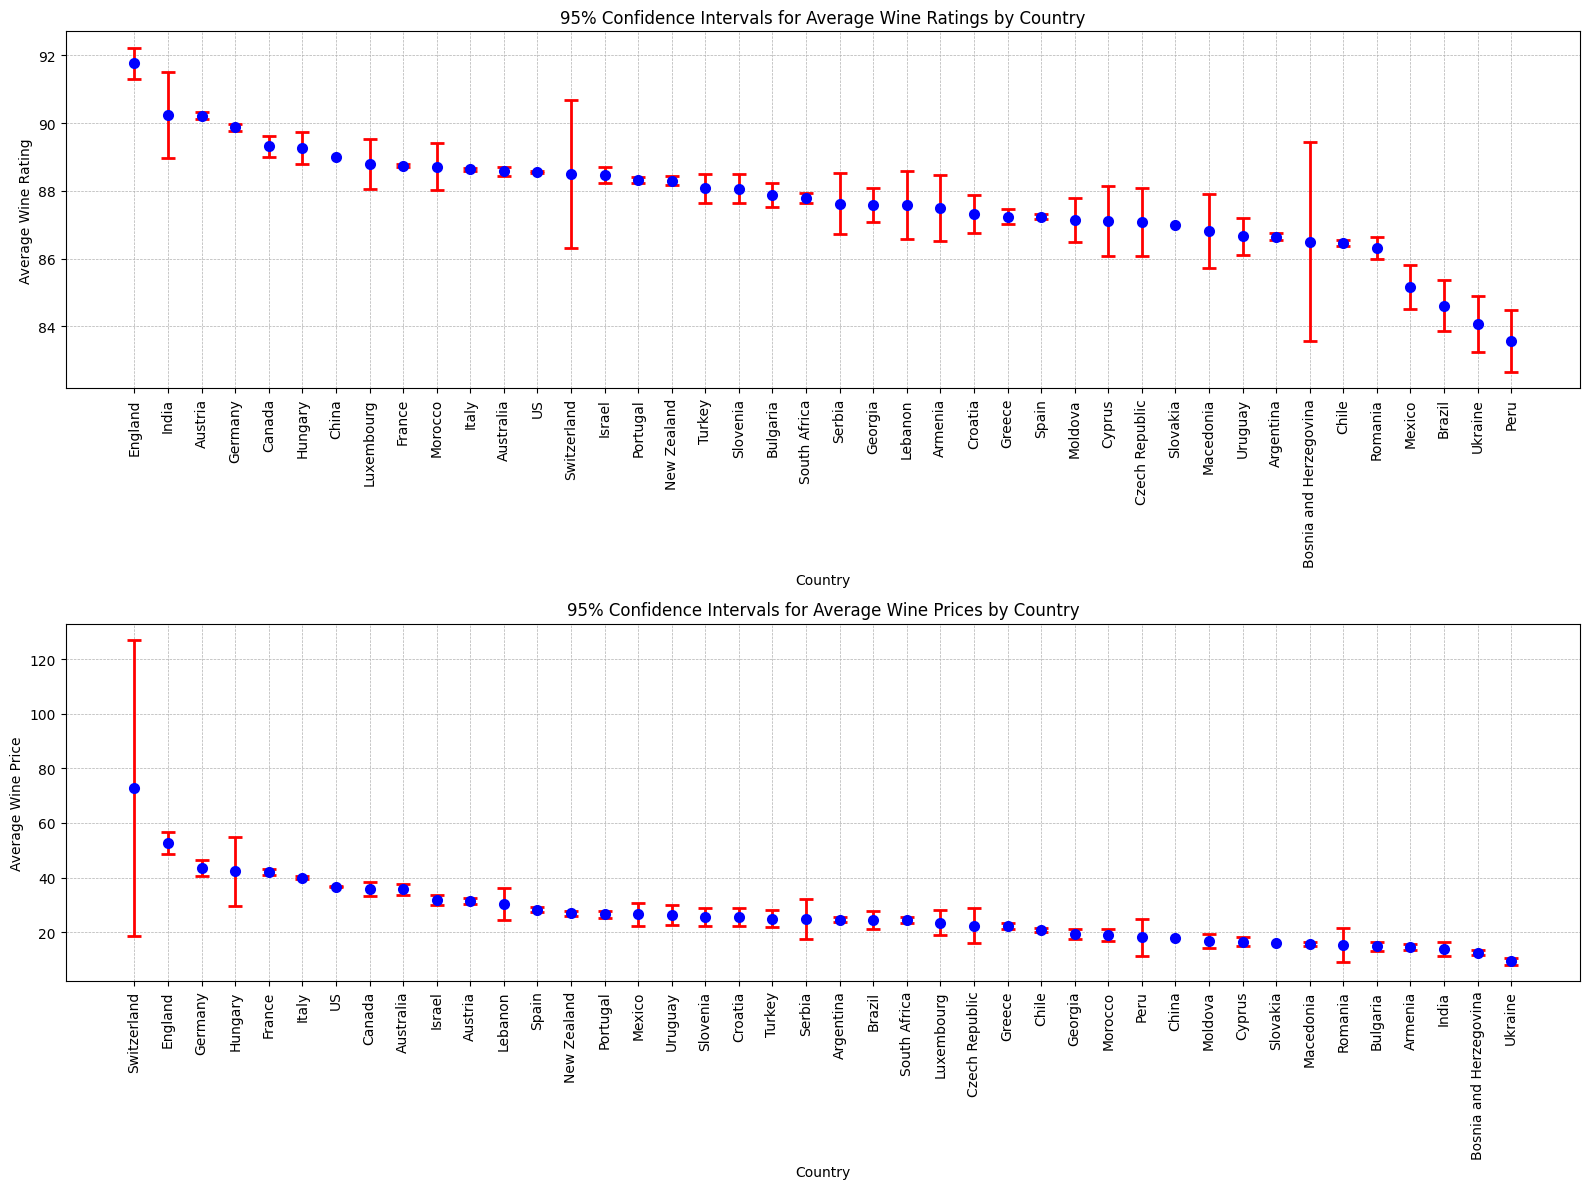

In [67]:
# Plotting the confidence intervals for both wine ratings and prices side by side

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot for wine ratings
ax1.errorbar(confidence_df['Country'], confidence_df['Mean'], 
             yerr=[confidence_df['Mean'] - confidence_df['Lower CI'], confidence_df['Upper CI'] - confidence_df['Mean']], 
             fmt='o', ecolor='r', capsize=5, elinewidth=2, markeredgewidth=2, color='blue')
ax1.set_xticklabels(confidence_df['Country'], rotation=90)
ax1.set_xlabel('Country')
ax1.set_ylabel('Average Wine Rating')
ax1.set_title('95% Confidence Intervals for Average Wine Ratings by Country')
ax1.grid(True, linestyle='--', linewidth=0.5)

# Plot for wine prices
ax2.errorbar(confidence_df_price['Country'], confidence_df_price['Mean'], 
             yerr=[confidence_df_price['Mean'] - confidence_df_price['Lower CI'], confidence_df_price['Upper CI'] - confidence_df_price['Mean']], 
             fmt='o', ecolor='r', capsize=5, elinewidth=2, markeredgewidth=2, color='blue')
ax2.set_xticklabels(confidence_df_price['Country'], rotation=90)
ax2.set_xlabel('Country')
ax2.set_ylabel('Average Wine Price')
ax2.set_title('95% Confidence Intervals for Average Wine Prices by Country')
ax2.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [68]:
# Calculate mean and standard error
mean_points = df['points'].mean()
sem_points = stats.sem(df['points'].dropna())

# Calculate the confidence interval
confidence_interval = stats.t.interval(0.95, len(df['points'].dropna())-1, loc=mean_points, scale=sem_points)
print(f'95% Confidence Interval for the Mean Points of Wines: {confidence_interval}')

95% Confidence Interval for the Mean Points of Wines: (88.39561673460544, 88.43199358654071)


In [69]:
# Calculate mean and standard error
mean_price = df['price'].mean()
sem_price = stats.sem(df['price'].dropna())

# Calculate the confidence interval
confidence_interval = stats.t.interval(0.95, len(df['price'].dropna())-1, loc=mean_price, scale=sem_price)
print(f'95% Confidence Interval for the Mean Price of Wines: {confidence_interval}')

95% Confidence Interval for the Mean Price of Wines: (35.37896175353649, 35.87325722116272)


# Linear Regression and correlation analysis

## Scatterplots and Correlation

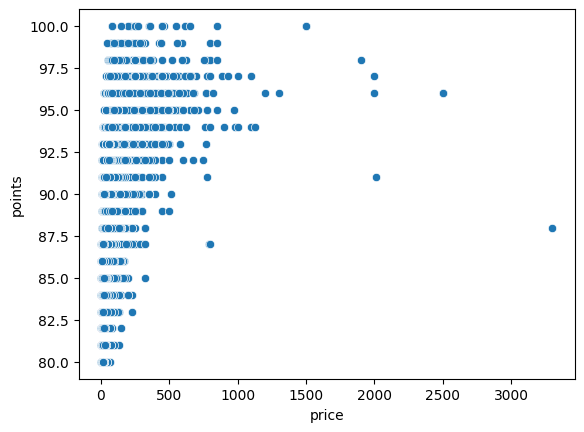

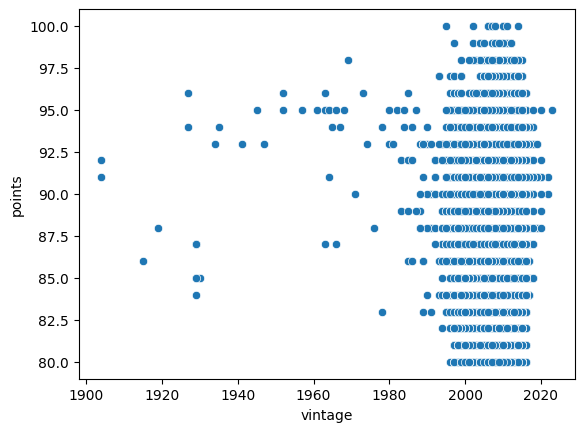

In [70]:
for i in ['price', 'vintage']:
    sns.scatterplot(data=df, x=i, y="points")
    plt.show()


<Figure size 1200x800 with 0 Axes>

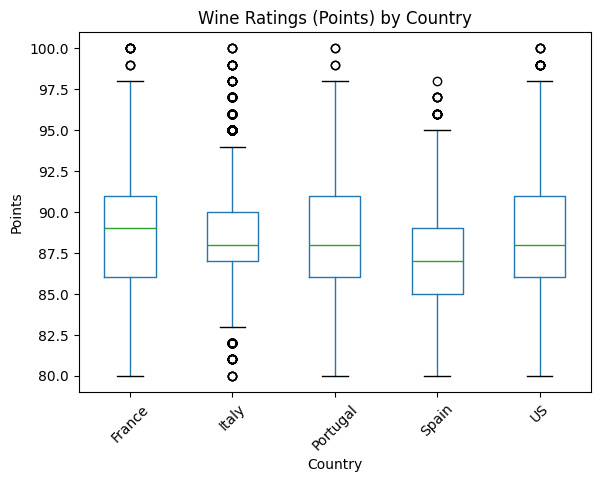

In [71]:
# Select top 10 countries by the number of wine reviews
top_countries = df['country'].value_counts().head(5).index
top_countries_data = df[df['country'].isin(top_countries)]

# Box plot for points by country
plt.figure(figsize=(12, 8))
top_countries_data.boxplot(column='points', by='country', grid=False)
plt.title('Wine Ratings (Points) by Country')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

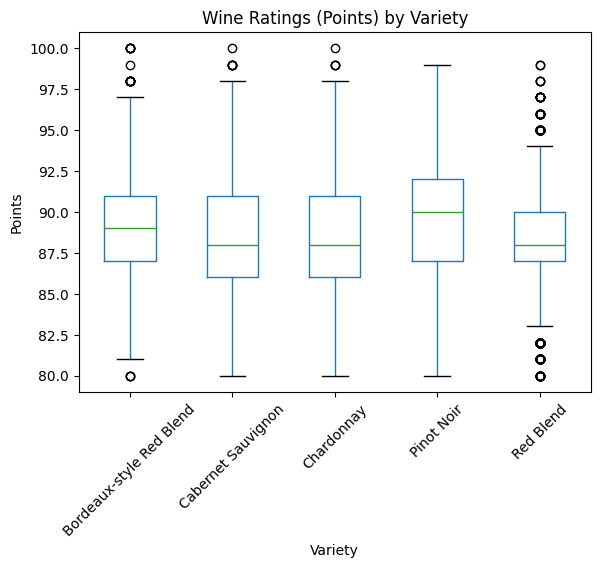

In [72]:
# Select top 10 varieties by the number of wine reviews
top_varieties = df['variety'].value_counts().head(5).index
top_varieties_data = df[df['variety'].isin(top_varieties)]

# Box plot for points by variety
plt.figure(figsize=(12, 8))
top_varieties_data.boxplot(column='points', by='variety', grid=False)
plt.title('Wine Ratings (Points) by Variety')
plt.suptitle('')
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

Index(['points', 'price', 'vintage', 'review_length', 'country_France',
       'country_Italy', 'country_Portugal', 'country_Spain', 'country_US',
       'variety_Bordeaux-style Red Blend', 'variety_Cabernet Sauvignon',
       'variety_Chardonnay', 'variety_Pinot Noir', 'variety_Red Blend'],
      dtype='object')
points                                int64
price                               float64
vintage                               Int64
review_length                         int64
country_France                         bool
country_Italy                          bool
country_Portugal                       bool
country_Spain                          bool
country_US                             bool
variety_Bordeaux-style Red Blend       bool
variety_Cabernet Sauvignon             bool
variety_Chardonnay                     bool
variety_Pinot Noir                     bool
variety_Red Blend                      bool
dtype: object


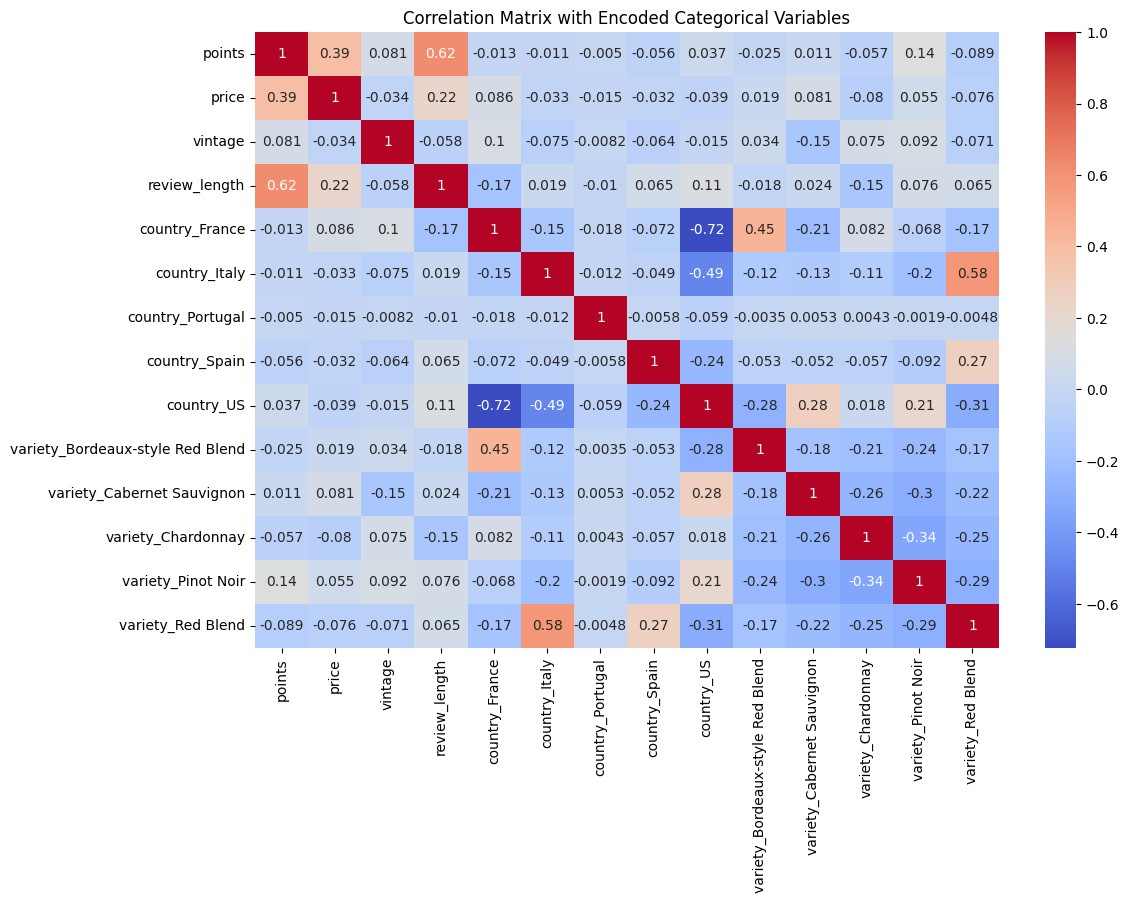

In [73]:
filtered_df = df[df['country'].isin(top_countries) & df['variety'].isin(top_varieties)]
columns_to_drop = ['description', 'designation', 'region_1', 'province', 'region_2', 'title', 'winery', 'price_category']
filtered_df = filtered_df.drop(columns=columns_to_drop)

numerical_columns = ['price', 'points']
categorical_columns = ['country', 'variety']


# Se desideri calcolare la matrice di correlazione includendo le variabili categoriche,
# potresti voler utilizzare la codifica one-hot per le variabili categoriche

# Creazione di un dataframe codificato
encoded_df = pd.get_dummies(filtered_df, columns=categorical_columns)

# Verifica delle colonne codificate e dei loro tipi di dati
print(encoded_df.columns)
print(encoded_df.dtypes)

# Assicurarsi che tutte le colonne siano numeriche
encoded_df = encoded_df.apply(pd.to_numeric, errors='coerce')

# Calcolare la matrice di correlazione per il dataframe codificato
encoded_correlation_matrix = encoded_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Categorical Variables')
plt.show()

## Simple Linear Regression 


predict that the country is Italy using the variety Red Blend

price = b_0 + b_1 * points


In [74]:
y = df['price']
x1 = df['points']

# Calcolo delle statistiche necessarie
my = y.mean()
sy = y.std()
n = len(y)
mx1 = x1.mean()
sx1 = x1.std()

# Calcolo del coefficiente di correlazione
num1 = ((x1 - mx1) * (y - my)).sum() / (n - 1)
den1 = sx1 * sy
R_variety = num1 / den1

print("Linear correlation coefficient between Price and Points = ", R_variety)

Linear correlation coefficient between Price and Points =  0.41656162063917945


In [75]:
x_name = 'points'
x = df[x_name].copy()
mx = x.mean()
sx = x.std()
R = encoded_correlation_matrix.loc[x_name, 'price']
b1 = sy/sx*R
b0 = my-b1*mx
n = 42  
# print(f" {'Hello'} {n} ")
print(f"Price = {b0} + {b1} * Points \nR^2 = {R**2}")

Price = -433.4805596214713 + 5.305807936405983 * Points 
R^2 = 0.1524684615659721


In [76]:
import statsmodels.api as sm
x = df[[x_name]].copy() # in statsmodel the intercept is modeled by adding a constant explanatory variable
x['intercept'] = 1
mod = sm.OLS(y, x) #OLS stands for ordinary least squares

fitted_mod = mod.fit()
print(fitted_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                 2.342e+04
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        15:12:29   Log-Likelihood:            -5.6483e+05
No. Observations:              111538   AIC:                         1.130e+06
Df Residuals:                  111536   BIC:                         1.130e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
points         5.6603      0.037    153.028      0.0

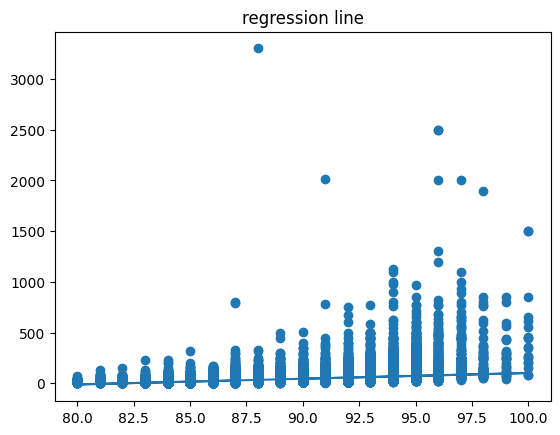

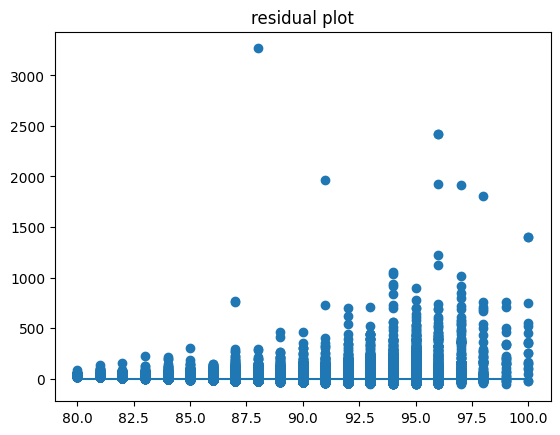

In [77]:
predictions = fitted_mod.predict(x)
plt.scatter(x = x['points'],y = y)
plt.plot(x['points'],predictions)
plt.title('regression line')
plt.show()

residuals = y-predictions
plt.scatter(x = x['points'],y = residuals)
plt.plot([x['points'].min(), x['points'].max()], [0,0])
plt.title('residual plot')
plt.show()

# Conclusions

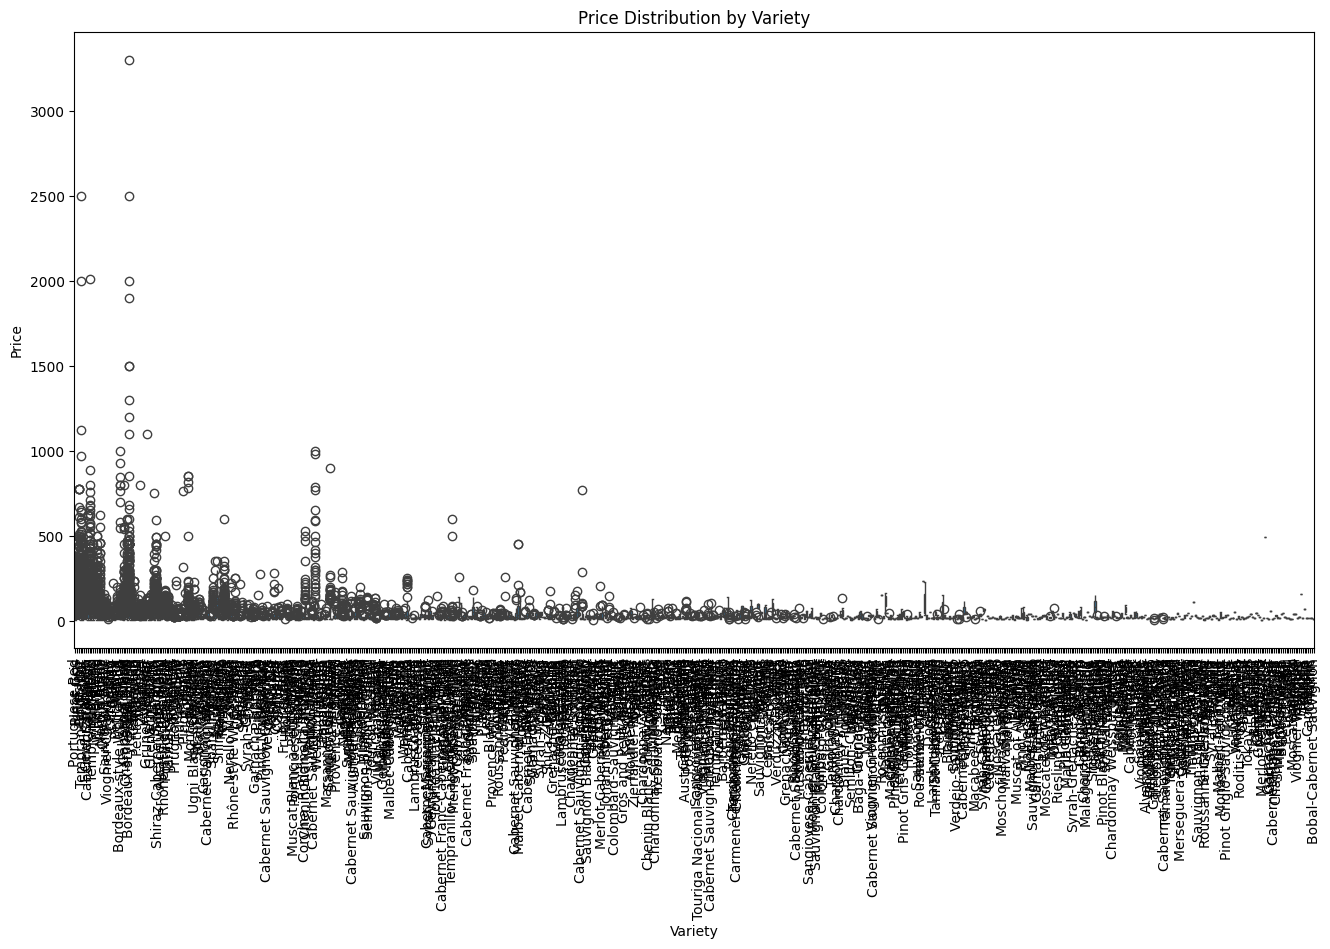

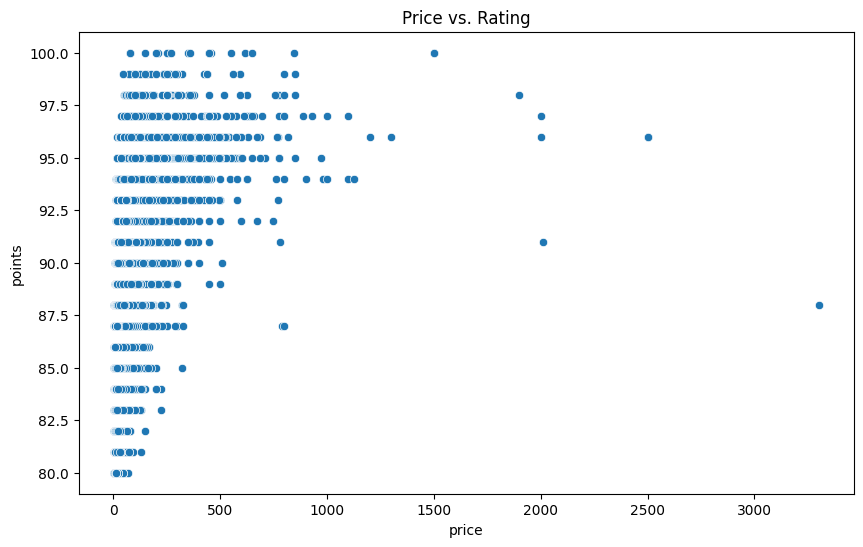

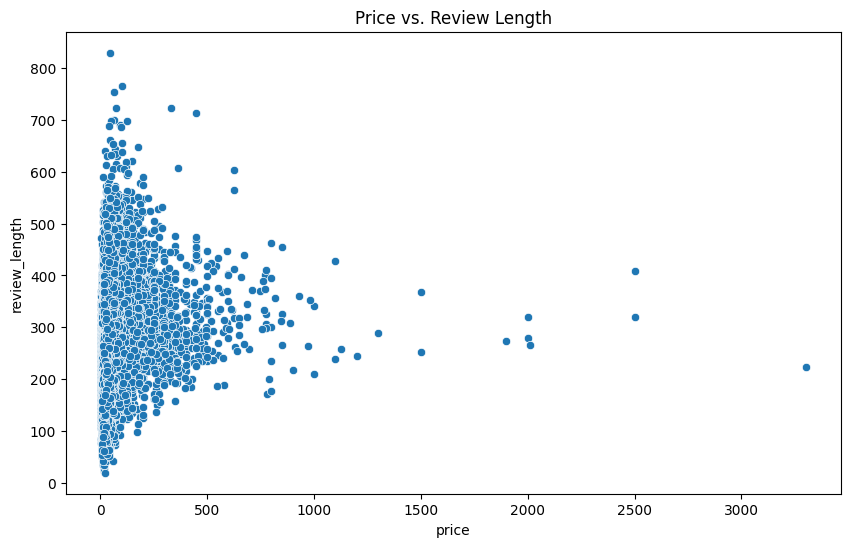

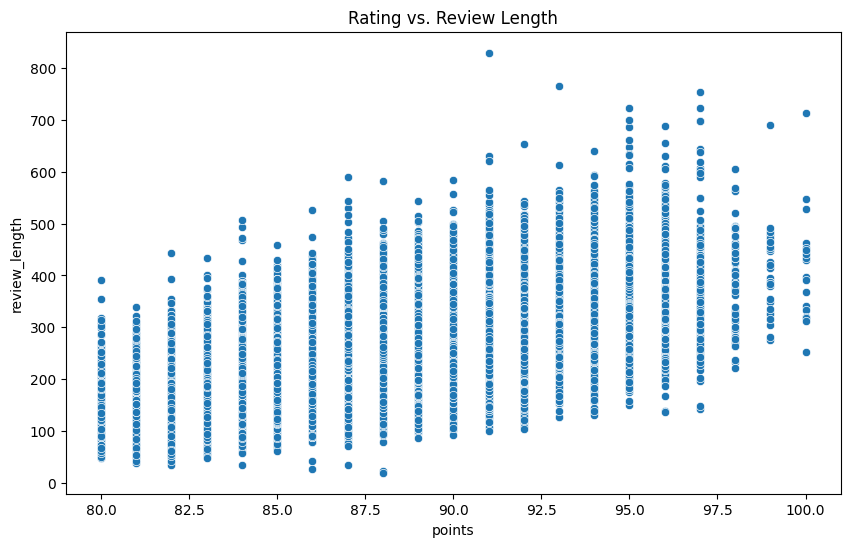

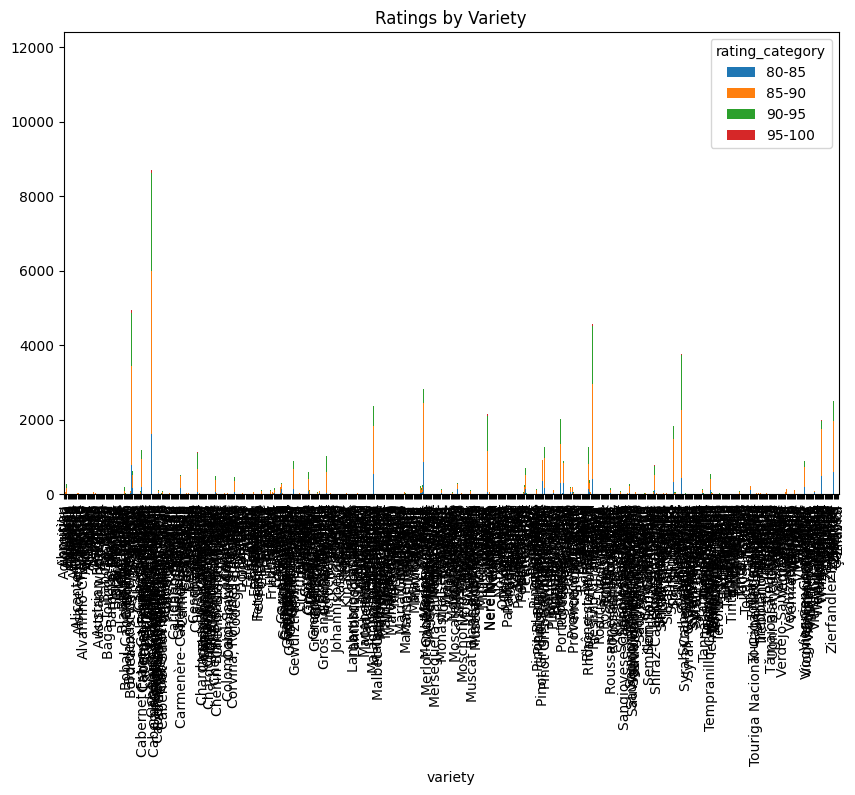

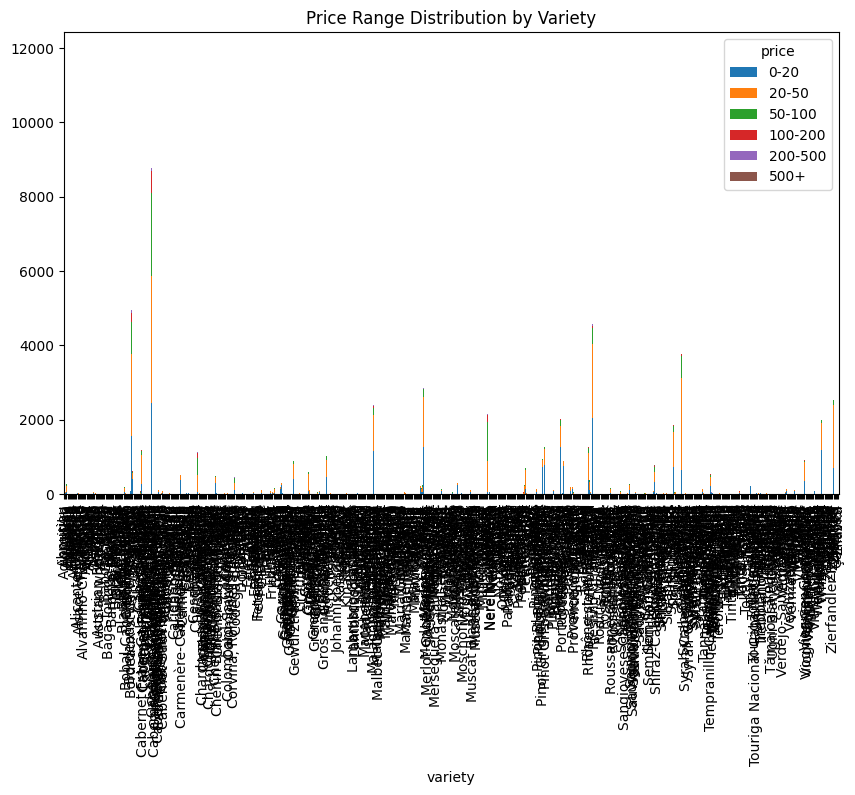

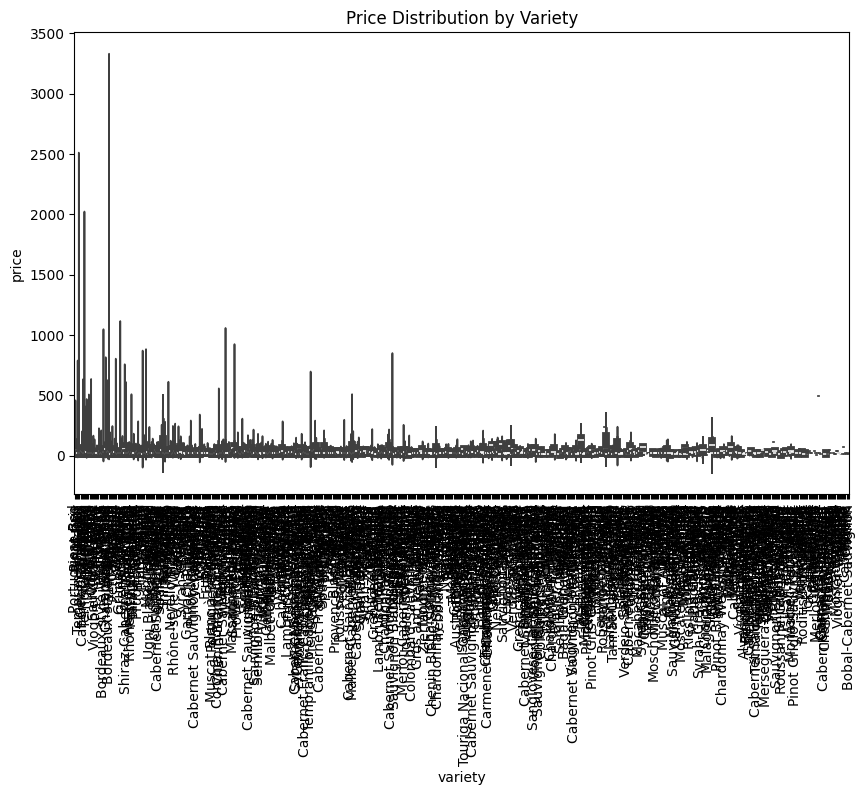

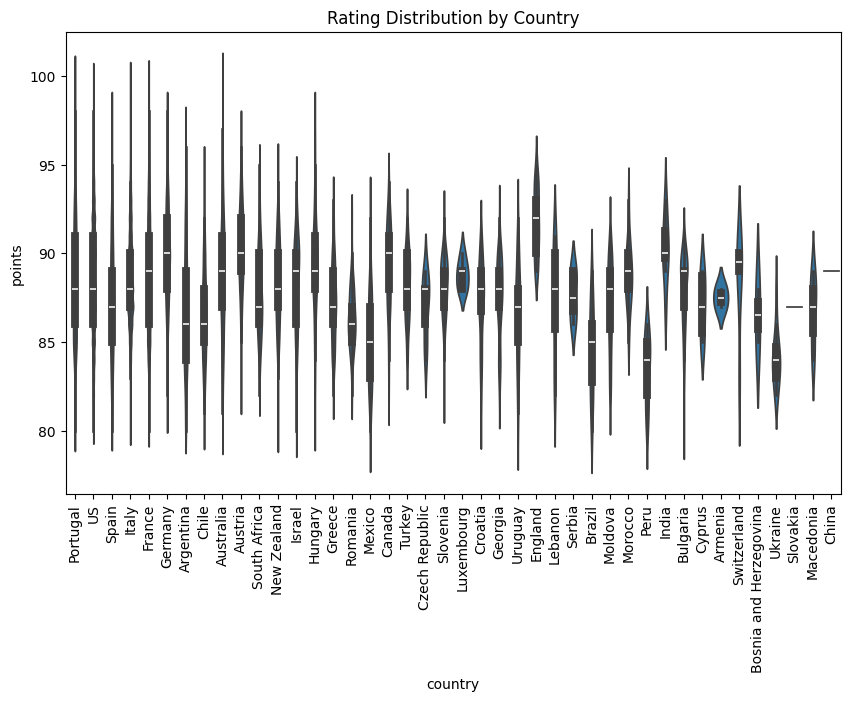

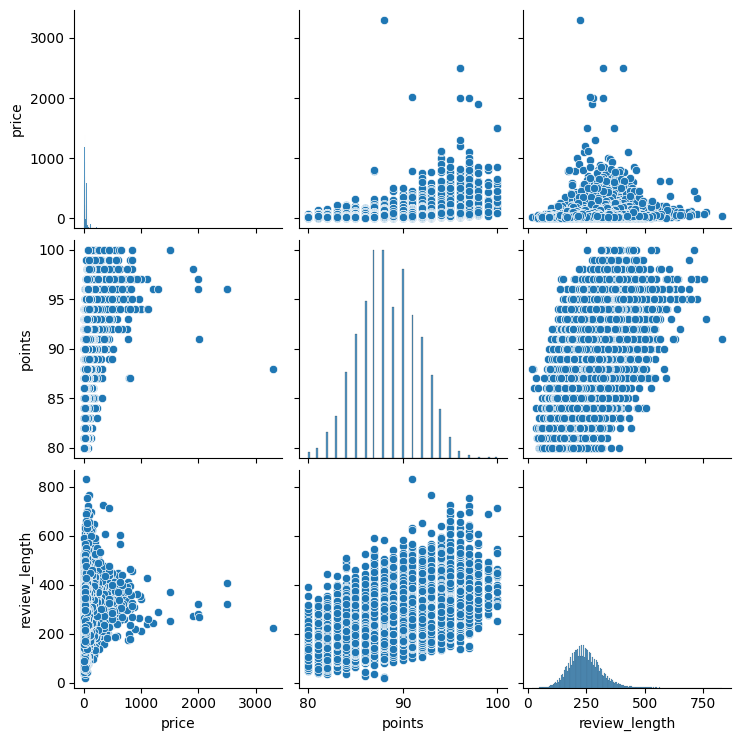

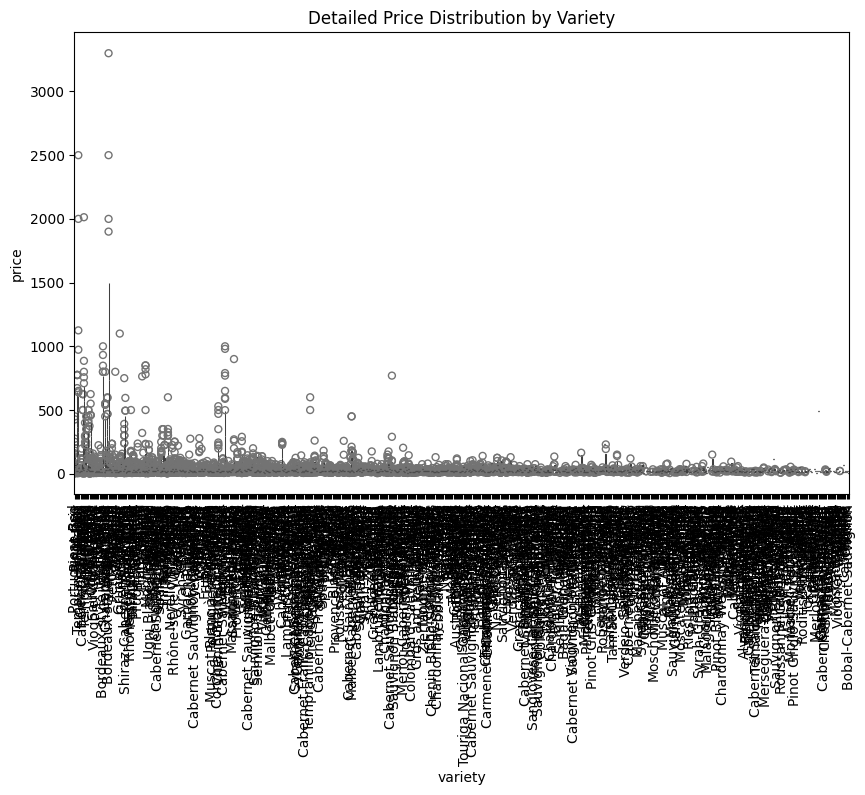

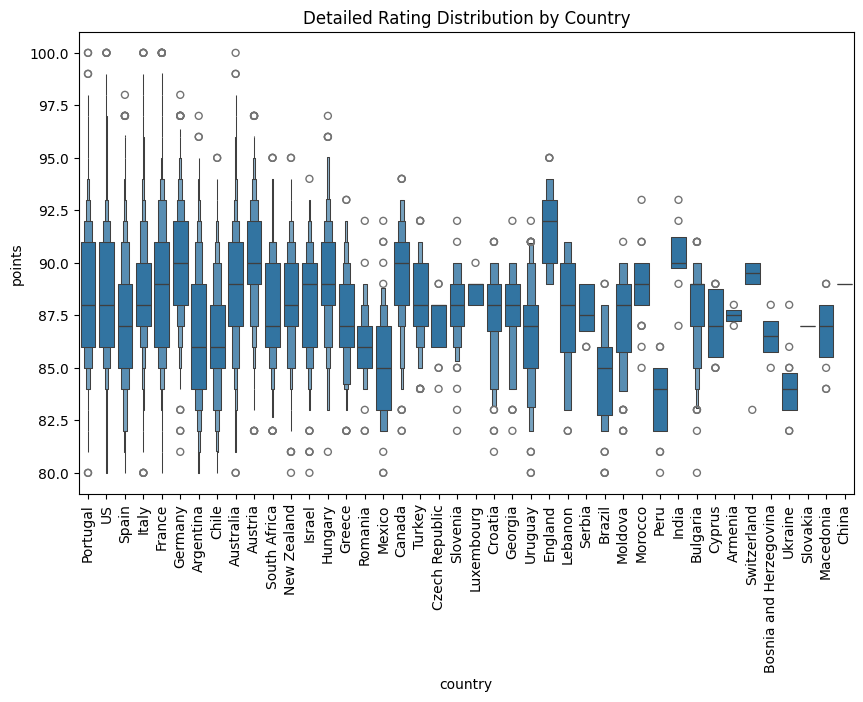

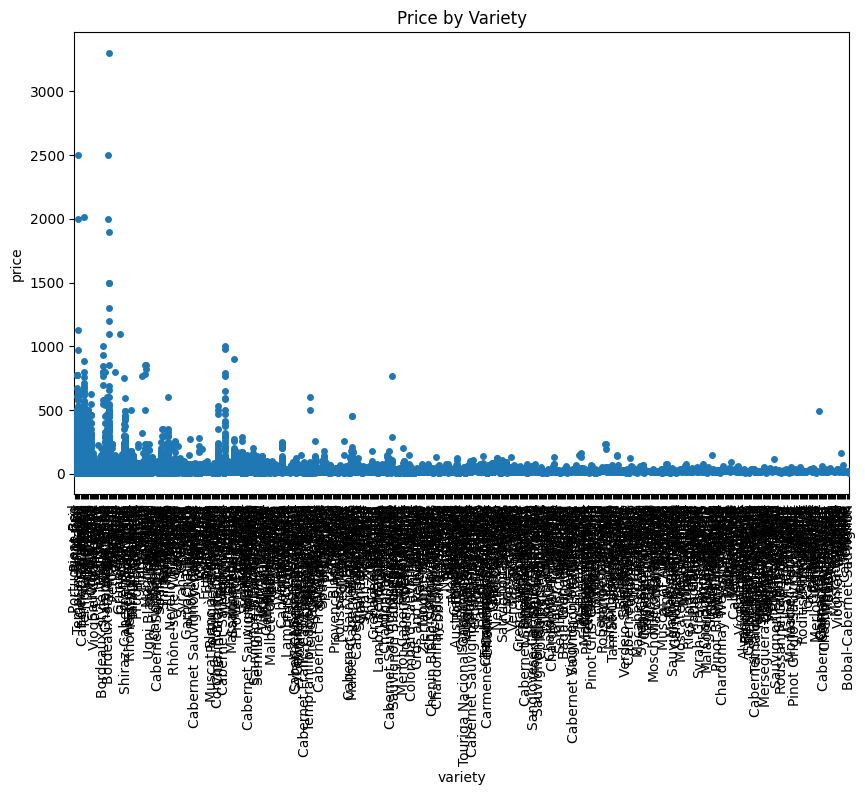

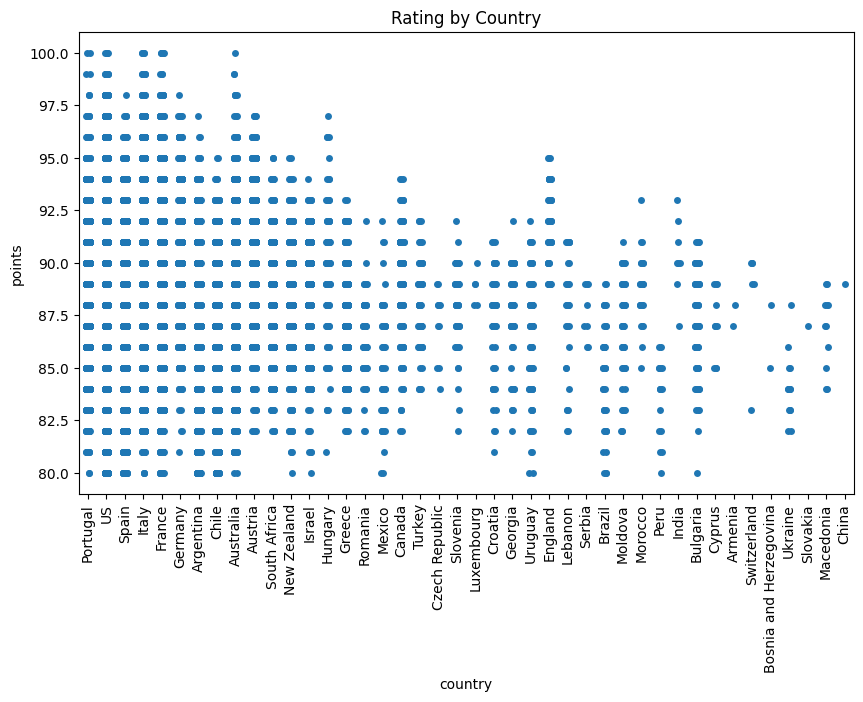

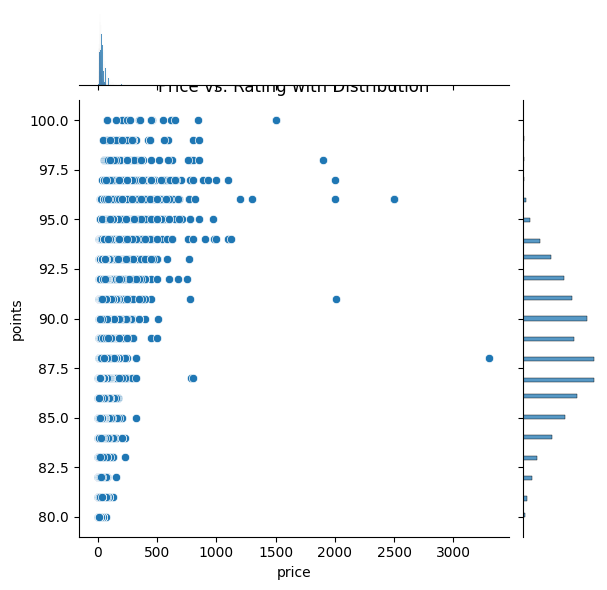

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud

# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Histograms and Density Plots

plt.figure(figsize=(16, 8))
sns.boxplot(x='variety', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Variety')
plt.xlabel('Variety')
plt.ylabel('Price')
plt.show()


# Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='points', data=df)
plt.title('Price vs. Rating')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_length', data=df)
plt.title('Price vs. Review Length')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='points', y='review_length', data=df)
plt.title('Rating vs. Review Length')
plt.show()


# Stacked Bar Charts
df['rating_category'] = pd.cut(df['points'], bins=[80, 85, 90, 95, 100], labels=['80-85', '85-90', '90-95', '95-100'])
stacked_data = df.groupby(['variety', 'rating_category']).size().unstack().fillna(0)
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Ratings by Variety')
plt.show()

price_ranges = pd.cut(df['price'], bins=[0, 20, 50, 100, 200, 500, 1000], labels=['0-20', '20-50', '50-100', '100-200', '200-500', '500+'])
stacked_price_data = df.groupby(['variety', price_ranges]).size().unstack().fillna(0)
stacked_price_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Price Range Distribution by Variety')
plt.show()

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='variety', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Variety')
plt.show()



# Pair Plots
sns.pairplot(df[['price', 'points', 'review_length']])
plt.show()

# Boxen Plots
plt.figure(figsize=(10, 6))
sns.boxenplot(x='variety', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Detailed Price Distribution by Variety')
plt.show()


# Strip Plots
plt.figure(figsize=(10, 6))
sns.stripplot(x='variety', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price by Variety')
plt.show()


# Joint Plots
sns.jointplot(x='price', y='points', data=df, kind='scatter')
plt.title('Price vs. Rating with Distribution')
plt.show()


In [79]:
fig = px.scatter(df, x='price', y='points', size='review_length', color='points',
                 hover_name='country', title='Price vs. Rating',
                 labels={'price':'Price', 'points':'Rating'},
                 size_max=60)
fig.update_layout(width=800, height=600)
fig.show()
fig = px.scatter(df, x='price', y='review_length', size='points', color='review_length',
                 hover_name='country', title='Price vs. Review Length',
                 labels={'price':'Price', 'review_length':'Review Length'},
                 size_max=60)
fig.update_layout(width=800, height=600)
fig.show()
 


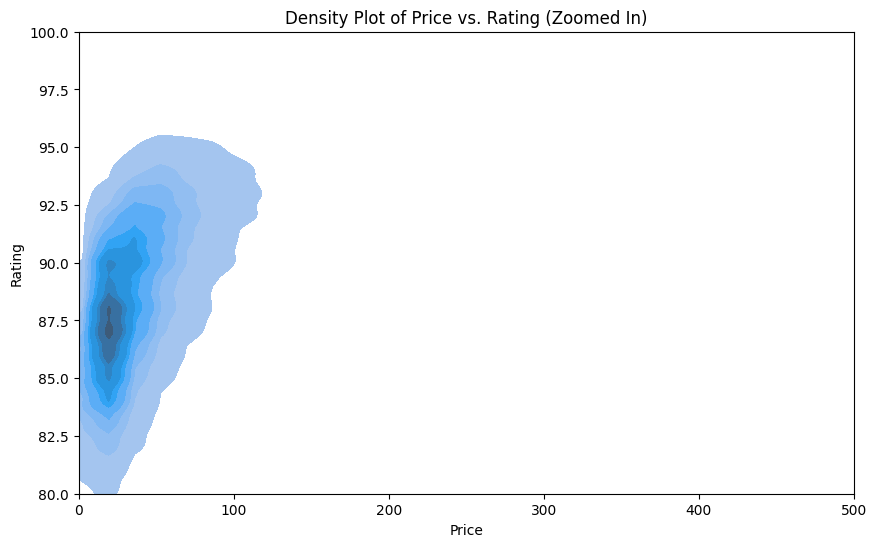

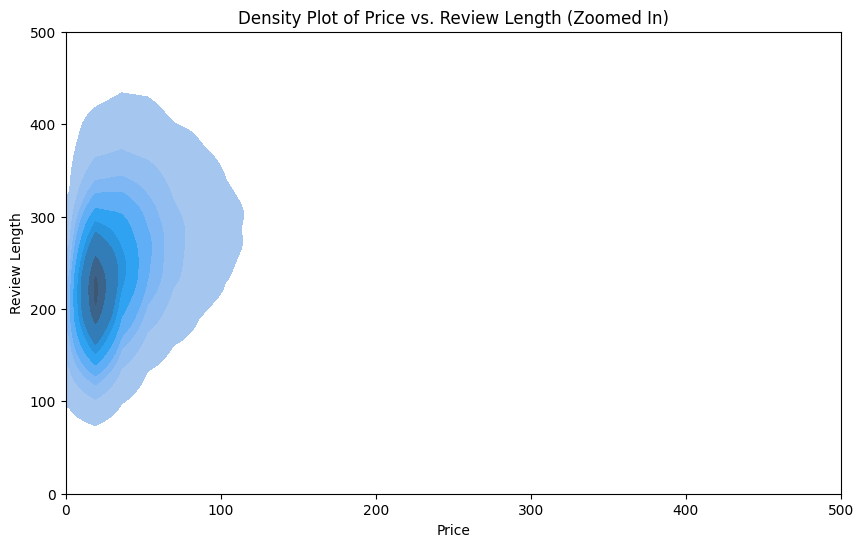

In [80]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='price', y='points', data=df, fill=True)
plt.xlim(0, 500)  # Limita l'asse x a 0-500
plt.ylim(80, 100)  # Limita l'asse y a 80-100
plt.title('Density Plot of Price vs. Rating (Zoomed In)')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Zoom su un intervallo specifico per Price vs. Review Length
plt.figure(figsize=(10, 6))
sns.kdeplot(x='price', y='review_length', data=df, fill=True)
plt.xlim(0, 500)  # Limita l'asse x a 0-500
plt.ylim(0, 500)  # Limita l'asse y a 0-500
plt.title('Density Plot of Price vs. Review Length (Zoomed In)')
plt.xlabel('Price')
plt.ylabel('Review Length')
plt.show()